In [39]:
import numpy as np
import torch
from torch import Tensor
from model import Encoder, Decoder, CVAE
import matplotlib.pyplot as plt
from PIL import Image

In [40]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [41]:
num_latent_dims = 128
max_num_dims = 64
input_shape = (1, 32, 32)

In [42]:
model_path = "work_dirs/20240410-154458-mnist/latest_model.pth"
model = CVAE(num_latent_dims, input_shape, max_num_dims).to(device)
model.load_state_dict(torch.load(model_path))
model

CVAE(
  (encoder): Encoder(
    (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (proj_mu): Linear(in_features=1024, out_features=128, bias=True)
    (proj_log_var): Linear(in_features=1024, out_features=128, bias=True)
  )
  (decoder): Decoder(
    (lin1): Linear(in_features=128, out_features=1024, bias=True)
    (upconv1): UpsamplingConv2d(
      (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (upconv2): UpsamplingConv2d(
      (conv): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

In [43]:
def generate(batch: int = 1):
    randn_input = torch.randn(batch, num_latent_dims).to(device)
    model.eval()
    with torch.inference_mode():
        images = model.decode(randn_input).cpu().permute(0, 2, 3, 1).numpy()
    return images

In [44]:
images = generate(12)
images.shape

(12, 32, 32, 1)

(array([11209.,   115.,    81.,    65.,    58.,    66.,    61.,   105.,
          164.,   364.]),
 array([0.        , 0.0995014 , 0.1990028 , 0.2985042 , 0.3980056 ,
        0.49750701, 0.59700841, 0.69650984, 0.79601121, 0.89551258,
        0.99501401]),
 <BarContainer object of 10 artists>)

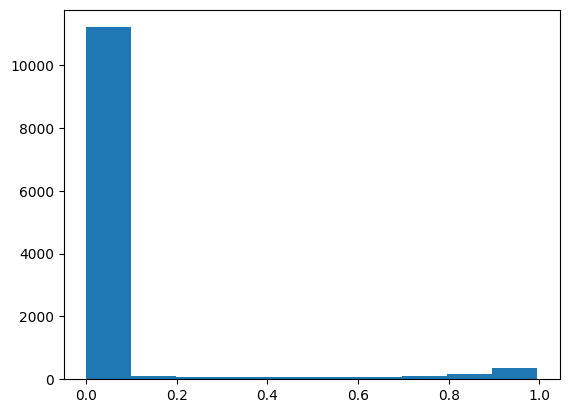

In [45]:
plt.hist(images.flatten())

In [46]:
# scale to 0-255
images = np.array(((images + 1) / 2) * 255, dtype=np.uint8)

(array([11205.,   122.,    79.,    63.,    59.,    68.,    56.,   108.,
          167.,   361.]),
 array([127. , 139.7, 152.4, 165.1, 177.8, 190.5, 203.2, 215.9, 228.6,
        241.3, 254. ]),
 <BarContainer object of 10 artists>)

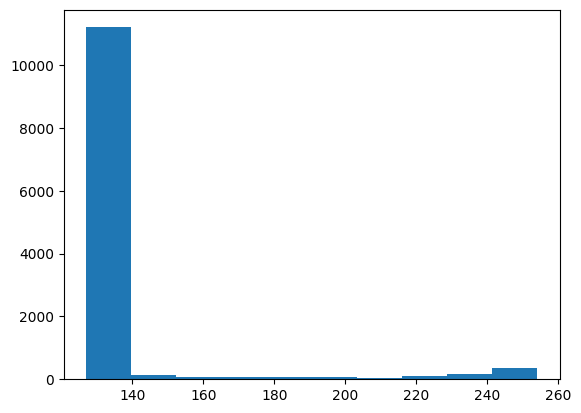

In [47]:
plt.hist(images.flatten())

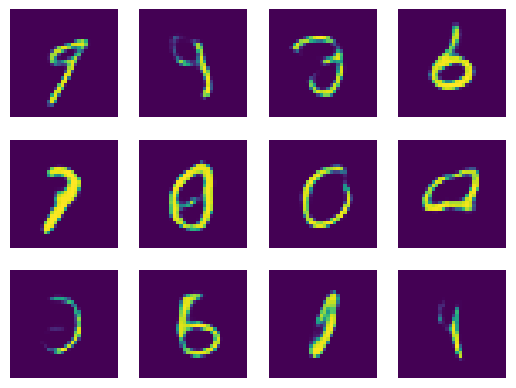

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=4)
for image, ax in zip(images, axes.ravel()):
    ax.imshow(image)
    ax.axis('off')